In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.grid import Boxes
from src.read_data import read_data
import dytop.Grid as Grid
import dytop.CMGDB_util as CMGDB_util
import CMGDB

### Load data

In [36]:
# smooth data
init_data = read_data('vp_ic11all.dat')
next_data = read_data('vp_next11all.dat')

# non-smooth data
# init_data = read_data('vel_phase_ic.dat')
# next_data = read_data('vel_phase_next.dat')

X = init_data[:, [0, 1]]
Y = next_data[:, [0, 1]]

init_impact_velocity = init_data[:, 0]
init_impact_phase = init_data[:, 1]
next_impact_phase = Y[:, 0]
next_impact_velocity = Y[:, 1]


In [5]:
plot_data = True

### Plot initial conditions (first impact) and next conditions (second impact)

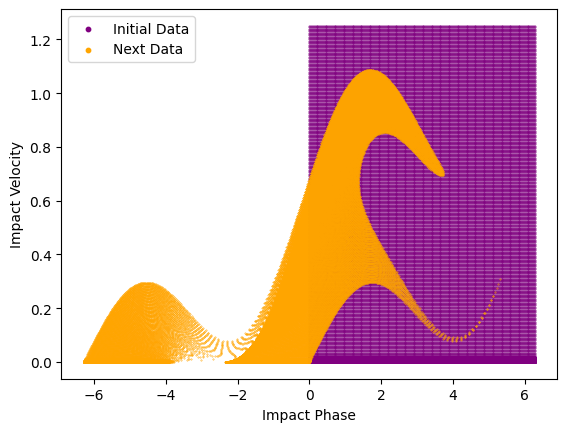

In [38]:
if plot_data: 
    plt.scatter(X[:,0], X[:,1], c='purple', s = 0.1, label='Initial Data')
    plt.scatter(Y[:,0], Y[:,1], c='orange', s = 0.1, label='Next Data')
    plt.xlabel('Impact Phase')
    plt.ylabel('Impact Velocity')
    plt.legend(markerscale=10)

### Phase surface

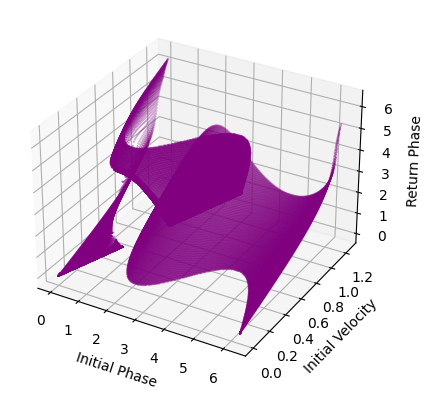

In [ ]:
if plot_data:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Initial Phase')
    ax.set_ylabel('Initial Velocity')
    ax.set_zlabel('Return Phase')
    ax.scatter(X[:,0], X[:,1], next_impact_phase, c='purple', s=0.1)

### Mod the phase variable by $2 \pi$

In [47]:
Y[:, 0] = Y[:, 0] % (2 * np.pi)
next_impact_phase = Y[:, 0]
next_impact_velocity = Y[:, 1]

### Plot initial conditions (first impact) and next conditions (second impact)

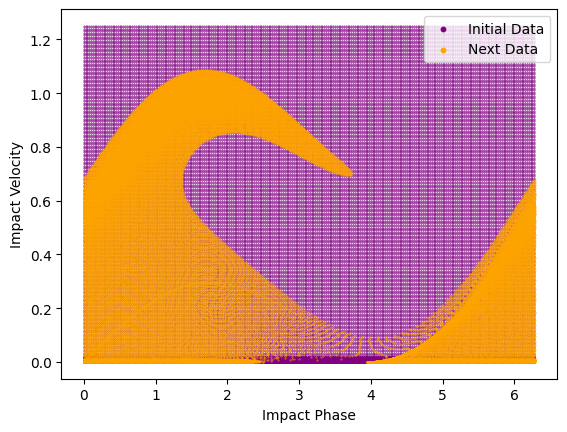

In [48]:
if plot_data: 
    plt.scatter(X[:,0], X[:,1], c='purple', s = 0.1, label='Initial Data')
    plt.scatter(Y[:,0], Y[:,1], c='orange', s = 0.1, label='Next Data')
    plt.xlabel('Impact Phase')
    plt.ylabel('Impact Velocity')
    plt.legend(markerscale=10)

### Phase surface

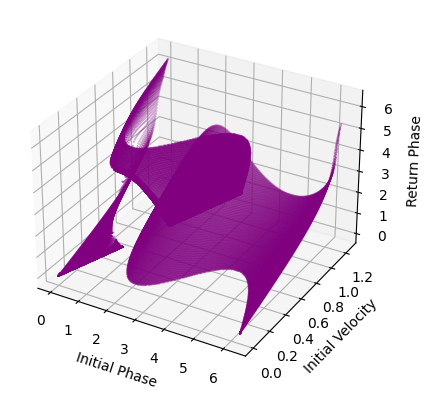

In [33]:
if plot_data:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Initial Phase')
    ax.set_ylabel('Initial Velocity')
    ax.set_zlabel('Return Phase')
    ax.scatter(X[:,0], X[:,1], next_impact_phase, c='purple', s=0.1)

### Velocity surface

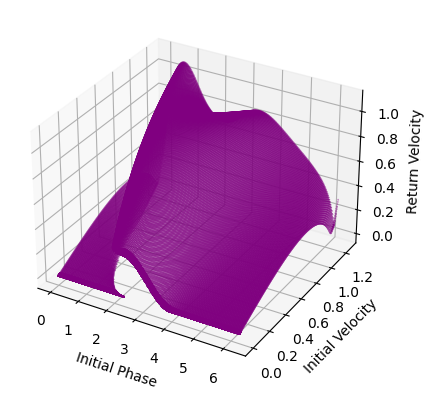

In [8]:
if plot_data:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], next_impact_velocity, c='purple', s=0.1)
    ax.set_xlabel('Initial Phase')
    ax.set_ylabel('Initial Velocity')
    ax.set_zlabel('Return Velocity')

### Calculate upper and lower bounds
The lower bound on the velocity variable is extended by 0.1.

In [55]:
lower_bounds_init = [np.min(init_impact_velocity), np.min(init_impact_phase)]
upper_bounds_init = [np.max(init_impact_velocity), np.max(init_impact_phase)]
print('Lower init bounds: ', lower_bounds_init)
print('Upper init bounds ', upper_bounds_init)

lower_next_bounds = [np.min(next_impact_velocity), np.min(next_impact_phase)]
upper_next_bounds = [np.max(next_impact_velocity), np.max(next_impact_phase)]
print('Lower next bounds ', lower_next_bounds)
print('Upper next bounds ', upper_next_bounds)

lower_bounds = [min(lower_bounds_init[0], lower_next_bounds[0]), min(lower_bounds_init[1], lower_next_bounds[1])]
upper_bounds = [max(upper_bounds_init[0], upper_next_bounds[0]), max(upper_bounds_init[1], upper_next_bounds[1])]
print('Lower bounds:', lower_bounds)
print('Upper bounds:', upper_bounds)

Lower init bounds:  [0.0, 2e-06]
Upper init bounds  [6.275, 1.25]
Lower next bounds  [2.2232226e-06, 4.9592564e-05]
Upper next bounds  [1.0870663, 6.283138574123586]
Lower bounds: [0.0, 2e-06]
Upper bounds: [6.275, 6.283138574123586]


### Persistence to identify potential discontinuities

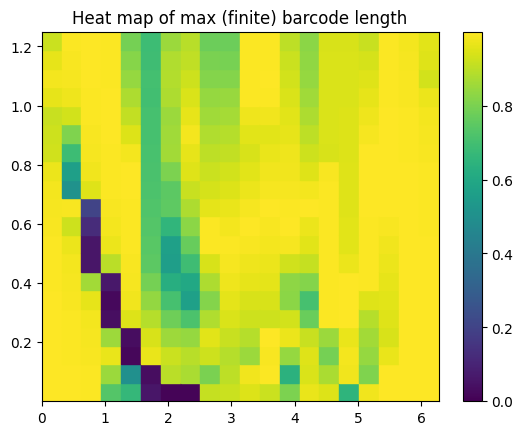

In [37]:
boxes = Boxes(lower_bounds_init, upper_bounds_init, 20)
boxes.plot(init_data, next_data, method='persistence')

### Conley-Morse graph

Here we use a periodic boundary condition on the phase variable.

Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 131072
Compute_Morse_Graph. B phase_space -> size () == 131072
Total Grid Memory (can be external) = 59770164
Max Memory For Single Grid (must be internal)= 9961694
Max SCC Random Access memory use (must be internal)= 1114112
Max SCC stack memory use (can be external memory) = 2091240
 ---- SUMMARY ---- 
Internal Memory Requirement = 11075806
External Memory Requirement = 61861404
Max graph memory size (never stored, however) = 8727088
ConleyIndex: calling RelativeMapHomology.
Dimension 1:
 Matrix is 29 x 29
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0 

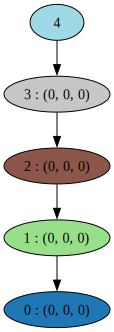

In [56]:
data = np.concatenate((X,Y),axis=1)

subdiv_limit = 10000

# k is the padding variable
k = 1

sb = 17

phase_periodic = [True, False]

grid = Grid.Grid(lower_bounds, upper_bounds, sb)

id2image = grid.id2image(data)

MG_util = CMGDB_util.CMGDB_util()

# uniform padding for each dimension
K=[k, k]
def F(rect):
    return MG_util.F_data(rect, id2image, grid.point2cell, K)

subdiv_init = sb
subdiv_min = sb
subdiv_max = sb

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, phase_periodic, F)

morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

CMGDB.PlotMorseGraph(morse_graph)

### Morse sets

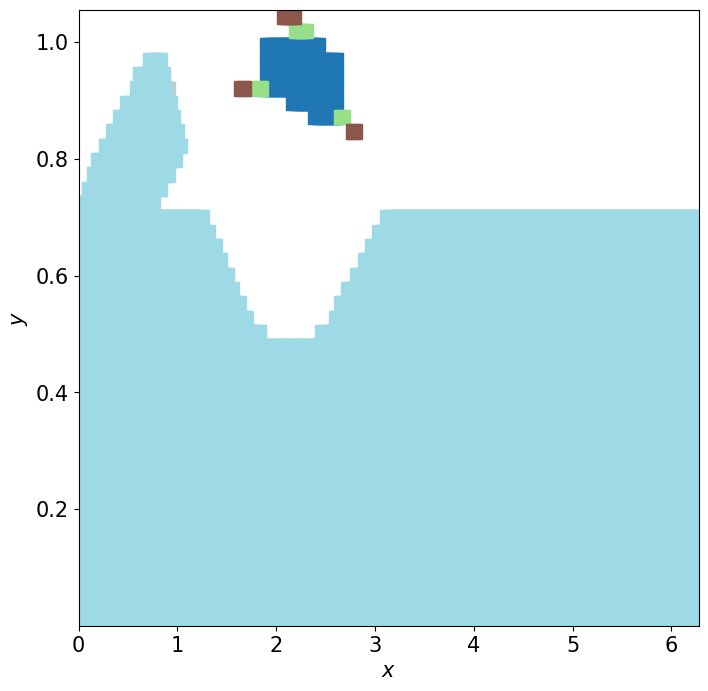

In [57]:
CMGDB.PlotMorseSets(morse_graph)